In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_efccca801d1b4d75b8c3aa5d3a3676dd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='7T1kkEYJYoLbT_-xH0K9OicbqUGYSPKVtH14NNjs3iZR',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_efccca801d1b4d75b8c3aa5d3a3676dd.get_object(Bucket='lifeexpectancy-donotdelete-pr-ow3bdssuau3yku',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
dataset= pd.read_csv(body)
dataset.head()
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import scipy.stats as stats
import statsmodels.api as sm

In [4]:
# Importing the dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 21].values

In [5]:
dataset.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [6]:
dataset.tail()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.0,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.0,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.0,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.0,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3
2937,Zimbabwe,2000,Developing,665.0,24,1.68,0.0,79.0,1483,25.5,...,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8,46.0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null float64
GDP                                2490 non-null

In [8]:
dataset.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2938.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2928.000000
mean,2007.518720,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,69.224932
std,4.613841,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,9.523867
min,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,2004.000000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,63.100000
50%,2008.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.100000
75%,2012.000000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,75.700000
max,2015.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,89.000000


In [9]:
dataset.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy '],
      dtype='object')

In [10]:
# Checking the null values
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64

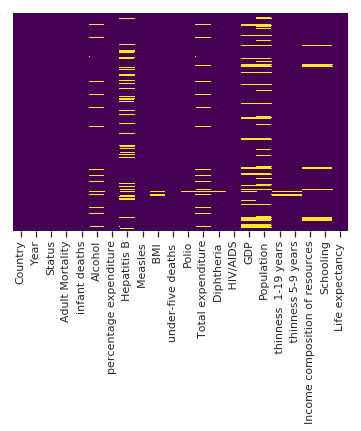

In [11]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
dataset.corr()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
Year,1.000000,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400,0.170033
Adult Mortality,-0.079052,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612,-0.696359
infant deaths,-0.037415,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720,-0.196557
Alcohol,-0.052990,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378,0.404877
percentage expenditure,0.031400,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687,0.381864
Hepatitis B,0.104333,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117,0.256762
Measles,-0.082493,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225,-0.157586
BMI,0.108974,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961,0.567694
under-five deaths,-0.042937,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373,-0.222529
Polio,0.094158,-0.274823,-0.170689,0.221734,0.147259,0.486171,-0.136166,0.284569,-0.188720,1.000000,0.137330,0.673553,-0.159560,0.211976,-0.038540,-0.221823,-0.222592,0.381078,0.417866,0.465556


Text(0.5, 1.0, 'Correlation')

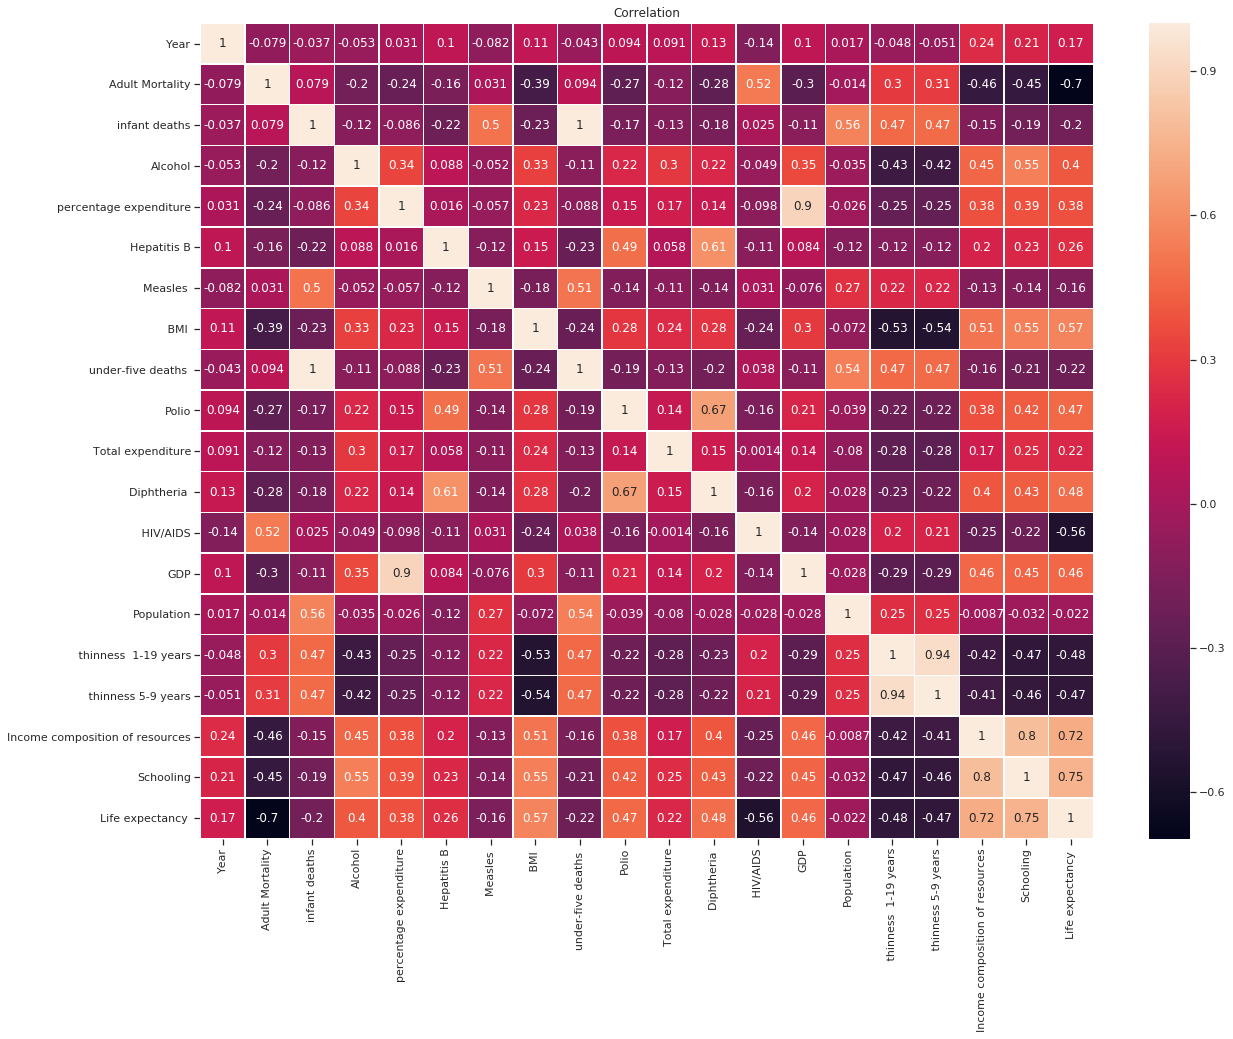

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(),annot=True, linecolor="white", linewidths=0.5)
plt.title("Correlation")

In [14]:
# Taking care of missing data
from sklearn.impute import SimpleImputer #sklearn is library

In [15]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') #nan is not a number
imputer = imputer.fit(dataset.iloc[:, 3:]) # fit calculates mean 
dataset.iloc[:, 3:] = imputer.transform(dataset.iloc[:, 3:]) #transform means to apply

In [16]:
dataset.isnull().sum()

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
dtype: int64

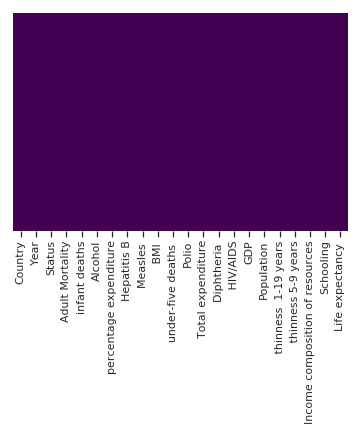

In [17]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
# Encoding categorical data i.e. converting categorical to numerical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
dataset.iloc[:, :1] = labelencoder_X.fit_transform(dataset.iloc[:, :1]) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
# Encoding categorical data i.e. converting categorical to numerical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
dataset.iloc[:, 1] = labelencoder_X.fit_transform(dataset.iloc[:, 1]) 

In [20]:
# Encoding categorical data ie converting categorical to numerical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
dataset.iloc[:, 2] = labelencoder_X.fit_transform(dataset.iloc[:, 2]) 

In [21]:
dataset.iloc[:, :1]

,Country
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [22]:
dataset.iloc[:, 1]

0       15
1       14
2       13
3       12
4       11
5       10
6        9
7        8
8        7
9        6
10       5
11       4
12       3
13       2
14       1
15       0
16      15
17      14
18      13
19      12
20      11
21      10
22       9
23       8
24       7
25       6
26       5
27       4
28       3
29       2
        ..
2908    13
2909    12
2910    11
2911    10
2912     9
2913     8
2914     7
2915     6
2916     5
2917     4
2918     3
2919     2
2920     1
2921     0
2922    15
2923    14
2924    13
2925    12
2926    11
2927    10
2928     9
2929     8
2930     7
2931     6
2932     5
2933     4
2934     3
2935     2
2936     1
2937     0
Name: Year, Length: 2938, dtype: int64

In [23]:
dataset.iloc[:, 2]

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
2908    1
2909    1
2910    1
2911    1
2912    1
2913    1
2914    1
2915    1
2916    1
2917    1
2918    1
2919    1
2920    1
2921    1
2922    1
2923    1
2924    1
2925    1
2926    1
2927    1
2928    1
2929    1
2930    1
2931    1
2932    1
2933    1
2934    1
2935    1
2936    1
2937    1
Name: Status, Length: 2938, dtype: int64

In [24]:
dataset

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,0,15,1,263.0,62.0,0.010000,71.279624,65.000000,1154.0,19.1,...,8.16000,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,0,14,1,271.0,64.0,0.010000,73.523582,62.000000,492.0,18.6,...,8.18000,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,0,13,1,268.0,66.0,0.010000,73.219243,64.000000,430.0,18.1,...,8.13000,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,0,12,1,272.0,69.0,0.010000,78.184215,67.000000,2787.0,17.6,...,8.52000,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,0,11,1,275.0,71.0,0.010000,7.097109,68.000000,3013.0,17.2,...,7.87000,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
5,0,10,1,279.0,74.0,0.010000,79.679367,66.000000,1989.0,16.7,...,9.20000,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,58.8
6,0,9,1,281.0,77.0,0.010000,56.762217,63.000000,2861.0,16.2,...,9.42000,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,58.6
7,0,8,1,287.0,80.0,0.030000,25.873925,64.000000,1599.0,15.7,...,8.33000,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,58.1
8,0,7,1,295.0,82.0,0.020000,10.910156,63.000000,1141.0,15.2,...,6.73000,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,57.5
9,0,6,1,295.0,84.0,0.030000,17.171518,64.000000,1990.0,14.7,...,7.43000,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,57.3


In [25]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 21].values

In [26]:
X

array([[  0.   ,  15.   ,   1.   , ...,  17.3  ,   0.479,  10.1  ],
       [  0.   ,  14.   ,   1.   , ...,  17.5  ,   0.476,  10.   ],
       [  0.   ,  13.   ,   1.   , ...,  17.7  ,   0.47 ,   9.9  ],
       ...,
       [192.   ,   2.   ,   1.   , ...,   1.3  ,   0.427,  10.   ],
       [192.   ,   1.   ,   1.   , ...,   1.7  ,   0.427,   9.8  ],
       [192.   ,   0.   ,   1.   , ...,  11.2  ,   0.434,   9.8  ]])

In [27]:
y

array([65. , 59.9, 59.9, ..., 44.8, 45.3, 46. ])

# Splitting the data for Training and Testing

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Creating and Training Model

In [29]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [31]:
# print the intercept
print(regressor.intercept_)

56.002855056381804


In [32]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10)
accuracies.mean()

0.8097552166472812

In [33]:
accuracies.std()

0.020073736522962286

# The mean squared error

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))

Mean squared error: 15.848181086484885


In [36]:
print("Variance score: {}".format(r2_score(y_test, y_pred)))

Variance score: 0.8276643117120794


# Predictions from our Model

In [37]:
predictions = regressor.predict(X_test)

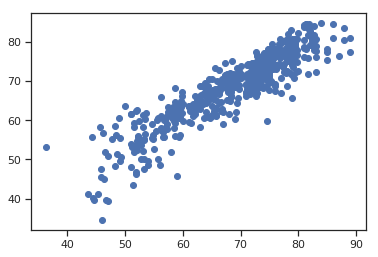

In [38]:
plt.scatter(y_test,predictions)

# Residual Histogram

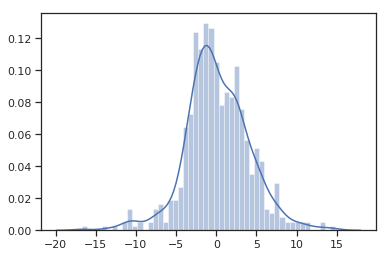

In [39]:
sns.distplot((y_test-predictions),bins=50);

In [40]:
!pip install watson-machine-learning-client

In [41]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-01 13:42:13,367 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [42]:
wml_credentials=
{
                    # Removed for github upload
}

In [43]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [46]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Vishu", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "vishu18csu232@ncuindia.edu", 
               client.repository.ModelMetaNames.NAME: "Life Expectancy"}

In [47]:
model_artifact =client.repository.store_model(regressor, meta_props=model_props)

In [48]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [49]:
published_model_uid

'c7ea87a0-9e38-4197-9c96-61468455ff1f'

In [50]:
deployment = client.deployments.create(published_model_uid, name="Life Expectancy")



#######################################################################################

Synchronous deployment creation for uid: 'c7ea87a0-9e38-4197-9c96-61468455ff1f' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='4e5822bb-0b24-4609-9fb1-d500ce8659c7'
------------------------------------------------------------------------------------------------




In [51]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [52]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/1b4c52ba-a851-4707-81aa-57eac3f6ad2a/deployments/4e5822bb-0b24-4609-9fb1-d500ce8659c7/online'